# Chapter 2 Understanding Variables

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# In pandas you can pass the url directly into read_csv()
pollution = pd.read_csv(
    'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011)/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011).csv'
)

In [3]:
len(pollution)

331

In [4]:
pollution.columns

Index(['Entity', 'Year', 'Smoke (Fouquet and DPCC (2011))',
       'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))'],
      dtype='object')

In [5]:
#rename the columns
pollution = pollution.rename(
    columns={
    'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))': 'SPM',
    'Smoke (Fouquet and DPCC (2011))' : 'Smoke',
    'Entity': 'City'
    }
)
pollution.dtypes

City      object
Year       int64
Smoke    float64
SPM      float64
dtype: object

In [6]:
#minimum and maximum years
pollution.Year.min(), pollution.Year.max()

(1700, 2016)

In [7]:
#finding out the values in the City column
pollution.City.unique()

array(['Delhi', 'London'], dtype=object)

In [8]:
#Our dataset has two cities, Delhi and London, and 
#has a time period of 1700 - 2016


In [9]:
#We need to convert Year column from int64 to datetime to help with plotting
pollution['Year'] = pollution['Year'].apply(
    lambda x: datetime.datetime.strptime(str(x), '%Y')
)
pollution.dtypes

City             object
Year     datetime64[ns]
Smoke           float64
SPM             float64
dtype: object

# Dealing with Missing Data


In [11]:
#to look for missing values in each column
pollution.isnull().sum()

City      0
Year      0
Smoke    30
SPM       0
dtype: int64

<AxesSubplot:>

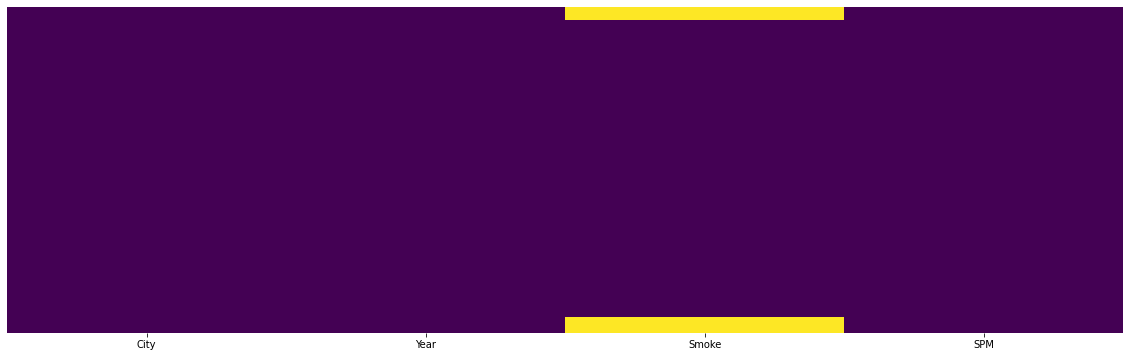

In [12]:
#to visually see the missing cells -- I kind-a love this!
plt.figure(figsize=(20, 6))
sns.heatmap(pollution.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## 1. To delete rows with missing values
### Either do this, or jump to 
### 2. Imputing the mean, 
### or 3. Putting in 0's

In [18]:
print(pollution.shape)

# delete rows with missing values
pollution.dropna(inplace=True)

# summarize the shape of the data with missing rows removed
print(pollution.shape)

(331, 4)
(317, 4)


<AxesSubplot:>

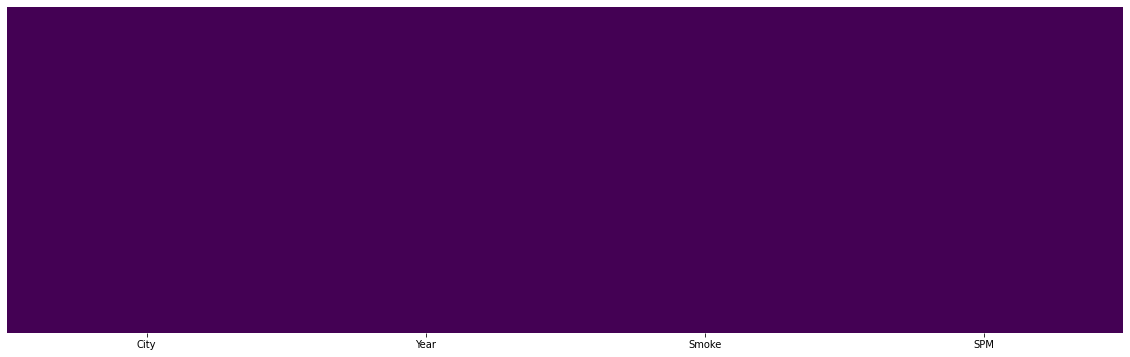

In [19]:
plt.figure(figsize=(20, 6))
sns.heatmap(pollution.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# 2. Imputing the mean into the missing cells

In [ ]:
pollution.fillna(pollution.mean(), inplace=True)
# count the number of NaN values in each column
print(pollution.isnull().sum())

In [ ]:
print(pollution.shape)

# 3. Fill missing values with 0s

In [ ]:
#look for the column name that had missing data - here it was "Smoke"
pollution.isnull().sum()

In [ ]:
pollution['Smoke'] = pollution['Smoke'].fillna(0)

In [ ]:
pollution.isnull().sum()

# Descriptive Statistics

In [20]:
pollution.describe()

,Smoke,SPM
count,317.000000,317.000000
mean,200.376115,364.069673
std,96.437580,175.831376
min,13.750000,15.000000
25%,154.285714,280.519480
50%,205.357143,373.376623
75%,286.714286,521.298701
max,342.857143,623.376623


Text(0, 0.5, 'Frequency')

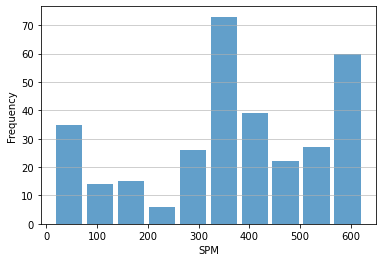

In [21]:
#plotting a histogram of the SPM variable
n, bins, patches = plt.hist(
    x=pollution['SPM'], bins='auto',
    alpha=0.7, rwidth=0.85
)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('SPM')
plt.ylabel('Frequency')